# Bourque 2014 *et al*.: A stoichiometric calibration method for dual energy computed tomography


## Calculating the effective atomic number and electron density 

The equations for applying the fitting is the following:

$$
\frac{\mu_{low\ kVp}}{\rho} = {A_{low\ kVp} + C_{low\ kVp}Z_{eff}^{m-1}}
$$

We have to accomplish the same equation at high energy:

$$
\frac{\mu_{high\ kVp}}{\rho} = {A_{high\ kVp} + C_{high\ kVp}Z_{eff}^{m-1}}
$$

In order to fit the equation above one needs at least four measurements of $\frac{(\mu_{80\ kVp}/rho)}{(\mu_{140\ kVp}/rho)}$, one for each material with known EAN and ED. Here I will take m=4.62.
Hence, you will have two distinct calibration curves for mu1//rho and mu2/rho. The ratio of these two curves gives mu1/mu2, which is analogous to what is obtained with Landry method, however, this second method allows you to calculate the density because you will have these two aforementioned curves, mu1/rho and mu2/rho. With these two calibrations you will have A1,C1,A2 and C2.


## Calibration file

The CSV file [calibration-w8e-NF.csv](calibration-w8e-NF.csv) has an example with some measurements performed in a reconstruction of a virtual phantom.

In this file the attenuation coefficients, defined as mu1 (low-energy) and mu2 (high-energy) are in units of $mm^{-1}$, and the effective atomic number (EAN) was calculated following Murty (1967?), using $\beta=2.94$.

## Purpose of jupyter notebook

The propose of this document is to show how the fitting is performed following Landry _et al._(2013) method.Here, Bourque et al (2014).

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from sklearn import *
#from sklearn.compose import TransformedTargetRegressor
#from sklearn.metrics import r2_score

In [2]:
# Import CSV file with measuremtns
calibration_file = pd.read_csv("medicalCT_2e94-70low-D45s-ex-try27.csv")
# Assign variables
#mu1 = calibration_file["mu1"].values # attenuation coefficient (low-energy)
mu2 = calibration_file["mu2"].values # attenuation coefficient (high-energy)
ean = calibration_file["EAN"].values # effective atomic number
ED = calibration_file["ED"].values # electronic density
rho = ED / 3.34279E+23   # dividere per ED dell'acqua per ottenere "relative ED"
#mu1_over_rho = mu1 / rho # mass attenuation coefficient low energy
mu2_over_rho = mu2 / rho # mass attenuation coefficient high energy
#mu1_over_mu2 = mu1 / mu2 # ratio of attenuation coefficients

In [3]:
# Define Bourque _et al._(2014) equation for fitting
def rho_bourque ( ean, c, b, a ):
    return (a+b*ean+c*ean**2)

In [4]:
# Fitting the data
bourque_curve = np.polyfit(ean, mu2_over_rho, 2,)

# Printing coefficients
print ( " f high E = {:.4f}\n e high E = {:.4f}\n d high E = {:.4f}\n".format(bourque_curve[0],bourque_curve[1],bourque_curve[2]) )

 f high E = 0.0027
 e high E = 0.0299
 d high E = 0.4962



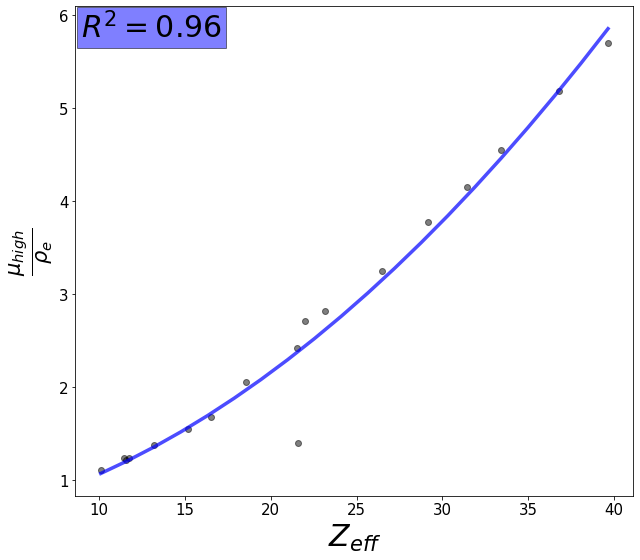

In [5]:
fig , ax = plt.subplots ( figsize = (10,9))
ax.tick_params(labelsize=15)
#ax.set_title("Bourque et al. (2014)")
ax.set_xlabel("$Z_{eff}$", size=30)
ax.set_ylabel("$\\frac{\\mu_{high}}{\\rho_e}$", size=30)

ax.plot(ean, mu2_over_rho, 'ko' , alpha=0.5)

ean_fit = np.linspace(np.amin(ean), np.amax(ean), 20)
mu2_over_rho_fit = rho_bourque ( ean_fit, *bourque_curve)
p = bourque_curve

ax.plot ( ean_fit, mu2_over_rho_fit, 'b-' , alpha = 0.7, linewidth = '3.5')

#ax.legend(["Measurements","Fitting equation \n $R^{2} = 0.96$"], prop={"size":20})
#plt.text(14,3.5,"\n $d_{high E} = 0.4962$ \n $e_{high E} = 0.0299$ \n $f_{high E} = 0.0027$ \n   \n $R^{2} = 0.96$", size=20)
#plt.text(32.4,0.95,"$R^{2} = 0.96$", size=30)
plt.text(.01, .99, '$R^{2} = 0.96$', ha='left', va='top', transform=ax.transAxes, size=30, bbox = dict(facecolor = 'blue', alpha = 0.5))


plt.savefig('medical rhoe high.pdf')

In [6]:
def residual ( function ,  xdata , ydata , popt ):
    residuals  = ydata - function ( xdata , *popt )
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1.0 - (ss_res / ss_tot)

r_sqared = residual(rho_bourque, ean, mu2_over_rho, bourque_curve)

print(r_sqared)

0.9688356543394505
